In [26]:
import pandas as pd
from sklearn.datasets import dump_svmlight_file
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read ./data/abalone.data 
columns = ["Feat 0", "Feat 1", "Feat 2", "Feat 3", "Feat 4", "Feat 5", "Feat 6", "Feat 7", "label"]
data = pd.read_csv('./data/abalone.data', header=None)
data.columns = columns

#group label
data["label"][data["label"] <= 9] = 1
data["label"][data["label"] >= 10] = 0

#do one hot encoding for feat 0
data = pd.get_dummies(data, columns=["Feat 0"])

data_train = data.iloc[:3133,:]
data_test = data.iloc[3133:,:]

#split into 5 disjoint sets
data_train_1 = data_train.iloc[:3133//5,:]
data_train_2 = data_train.iloc[3133//5:2*3133//5,:]
data_train_3 = data_train.iloc[2*3133//5:3*3133//5,:]
data_train_4 = data_train.iloc[3*3133//5:4*3133//5,:]
data_train_5 = data_train.iloc[4*3133//5:,:]

def df_to_libsvm(df: pd.DataFrame, filename: str):
    x = df.drop('label', axis=1)
    y = df['label']
    dump_svmlight_file(X=x, y=y, f=filename, zero_based=True)

#save all 5 sets
df_to_libsvm(data_train_1, './data/abalone_train_1.data')
df_to_libsvm(data_train_2, './data/abalone_train_2.data')
df_to_libsvm(data_train_3, './data/abalone_train_3.data')
df_to_libsvm(data_train_4, './data/abalone_train_4.data')
df_to_libsvm(data_train_5, './data/abalone_train_5.data')

#save all
df_to_libsvm(data_train, './data/abalone_train.data')

#save test
df_to_libsvm(data_test, './data/abalone_test.data')

#concat 1,2,3,4 => 5
data_train_concat1234 = pd.concat([data_train_1, data_train_2, data_train_3, data_train_4])

#concat 1,2,3,5 => 4
data_train_concat1235 = pd.concat([data_train_1, data_train_2, data_train_3, data_train_5])

#concat 1,2,4,5 => 3
data_train_concat1245 = pd.concat([data_train_1, data_train_2, data_train_4, data_train_5])

#concat 1,3,4,5 => 2
data_train_concat1345 = pd.concat([data_train_1, data_train_3, data_train_4, data_train_5])

#concat 2,3,4,5 => 1
data_train_concat2345 = pd.concat([data_train_2, data_train_3, data_train_4, data_train_5])

#save all
df_to_libsvm(data_train_concat1234, './data/abalone_train_concat1234.data')
df_to_libsvm(data_train_concat1235, './data/abalone_train_concat1235.data')
df_to_libsvm(data_train_concat1245, './data/abalone_train_concat1245.data')
df_to_libsvm(data_train_concat1345, './data/abalone_train_concat1345.data')
df_to_libsvm(data_train_concat2345, './data/abalone_train_concat2345.data')

import os
import math

for d in range(1,6):
    print("Degree: ", d)
    for k in range(-8,9,1):
        c = math.pow(3,k)
        print("C: ", c, "K: ", k)
        print("1234 -> 5")
        os.system(f"./libsvm/svm-train -s 0 -t 1 -d {d} -c {c} ./data/abalone_train_1234_scaled.data ./cross_validation/abalone_train_1234_scaled.model")
        os.system(f"./libsvm/svm-predict ./data/abalone_train_5_scaled.data ./cross_validation/abalone_train_1234_scaled.model ./cross_validation/abalone_train_1234_scaled_{d}_{c}.predict")

        print("1235 -> 4")
        os.system(f"./libsvm/svm-train -s 0 -t 1 -d {d} -c {c} ./data/abalone_train_1235_scaled.data ./cross_validation/abalone_train_1235_scaled.model")
        os.system(f"./libsvm/svm-predict ./data/abalone_train_4_scaled.data ./cross_validation/abalone_train_1235_scaled.model ./cross_validation/abalone_train_1235_scaled_{d}_{c}.predict")

        print("1245 -> 3")
        os.system(f"./libsvm/svm-train -s 0 -t 1 -d {d} -c {c} ./data/abalone_train_1245_scaled.data ./cross_validation/abalone_train_1245_scaled.model")
        os.system(f"./libsvm/svm-predict ./data/abalone_train_3_scaled.data ./cross_validation/abalone_train_1245_scaled.model ./cross_validation/abalone_train_1245_scaled_{d}_{c}.predict")

        print("1345 -> 2")
        os.system(f"./libsvm/svm-train -s 0 -t 1 -d {d} -c {c} ./data/abalone_train_1345_scaled.data ./cross_validation/abalone_train_1345_scaled.model")
        os.system(f"./libsvm/svm-predict ./data/abalone_train_2_scaled.data ./cross_validation/abalone_train_1345_scaled.model ./cross_validation/abalone_train_1345_scaled_{d}_{c}.predict")

        print("2345 -> 1")
        os.system(f"./libsvm/svm-train -s 0 -t 1 -d {d} -c {c} ./data/abalone_train_2345_scaled.data ./cross_validation/abalone_train_2345_scaled.model")
        os.system(f"./libsvm/svm-predict ./data/abalone_train_1_scaled.data ./cross_validation/abalone_train_2345_scaled.model ./cross_validation/abalone_train_2345_scaled_{d}_{c}.predict")

#i now collect results and save in FML_HW2.csv


In [3]:
cross_val_results = pd.read_csv("FML_HW2.csv")
print(cross_val_results.columns)

Index(['Unnamed: 0', 'K:  -8', 'K:  -7', 'K:  -6', 'K:  -5', 'K:  -4',
       'K:  -3', 'K:  -2', 'K:  -1', 'K:  0', 'K:  1', 'K:  2', 'K:  3',
       'K:  4', 'K:  5', 'K:  6', 'K:  7', 'K:  8'],
      dtype='object')


In [14]:
degree1 = cross_val_results.iloc[0:5,:]
degree2 = cross_val_results.iloc[5:10,:]
degree3 = cross_val_results.iloc[10:15,:]
degree4 = cross_val_results.iloc[15:20,:]
degree5 = cross_val_results.iloc[20:25,:]

degree1_avg = np.mean(degree1, axis=0)
degree2_avg = np.mean(degree2, axis=0)
degree3_avg = np.mean(degree3, axis=0)
degree4_avg = np.mean(degree4, axis=0)
degree5_avg = np.mean(degree5, axis=0)

degree1_std = np.std(degree1, axis=0)
degree2_std = np.std(degree2, axis=0)
degree3_std = np.std(degree3, axis=0)
degree4_std = np.std(degree4, axis=0)
degree5_std = np.std(degree5, axis=0)

/Users/mnpham/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/mnpham/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


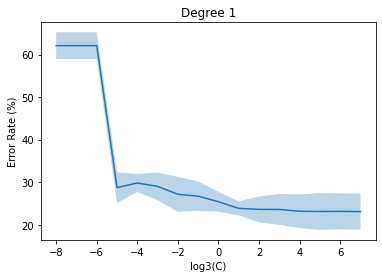

In [19]:
plt.plot(list(range(-8,8,1)), list(100 - degree1_avg))
plt.fill_between(list(range(-8,8,1)), 100 - (degree1_avg-degree1_std), 100 - (degree1_avg+degree1_std), alpha=0.3)
plt.title("Degree 1")
plt.xlabel("log3(C)")
plt.ylabel("Error Rate (%)")
plt.show()

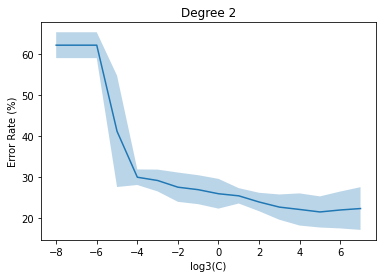

In [20]:
plt.plot(list(range(-8,8,1)), list(100 - degree2_avg))
plt.fill_between(list(range(-8,8,1)), 100 - (degree2_avg-degree2_std), 100 - (degree2_avg+degree2_std), alpha=0.3)
plt.title("Degree 2")
plt.xlabel("log3(C)")
plt.ylabel("Error Rate (%)")
plt.show()

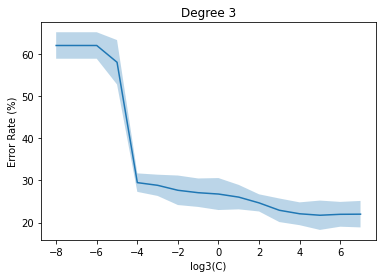

In [22]:
plt.plot(list(range(-8,8,1)), list(100 - degree3_avg))
plt.fill_between(list(range(-8,8,1)), 100 - (degree3_avg-degree3_std), 100 - (degree3_avg+degree3_std), alpha=0.3)
plt.title("Degree 3")
plt.xlabel("log3(C)")
plt.ylabel("Error Rate (%)")
plt.show()

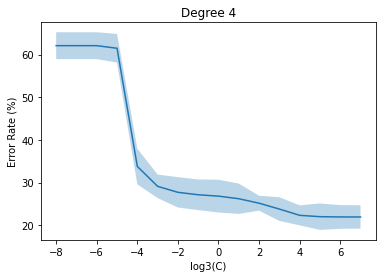

In [23]:
plt.plot(list(range(-8,8,1)), list(100 - degree4_avg))
plt.fill_between(list(range(-8,8,1)), 100 - (degree4_avg - degree4_std), 100 - (degree4_avg + degree4_std), alpha=0.3)
plt.title("Degree 4")
plt.xlabel("log3(C)")
plt.ylabel("Error Rate (%)")
plt.show()

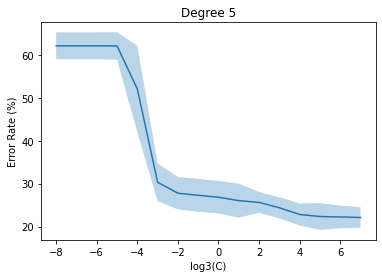

In [24]:
plt.plot(list(range(-8,8,1)), list(100 - degree5_avg))
plt.fill_between(list(range(-8,8,1)), 100 - (degree5_avg-degree5_std), 100 - (degree5_avg+degree5_std), alpha=0.3)
plt.title("Degree 5")
plt.xlabel("log3(C)")
plt.ylabel("Error Rate (%)")
plt.show()

K:  8 76.92042
K:  5 78.51656
K:  5 78.26136
K:  7 78.07044
K:  8 77.87910000000001


Text(0, 0.5, 'Error Rate (%)')

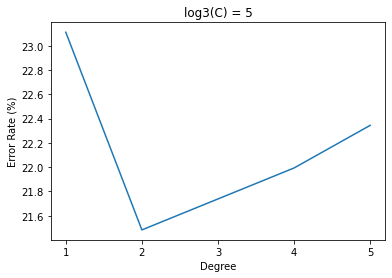

In [25]:
#print max and max index of each degree
print(degree1_avg.idxmax(), degree1_avg.max())
print(degree2_avg.idxmax(), degree2_avg.max())
print(degree3_avg.idxmax(), degree3_avg.max())
print(degree4_avg.idxmax(), degree4_avg.max())
print(degree5_avg.idxmax(), degree5_avg.max())

#plot error rate for k = 8 as a function of degree
l = [degree1_avg["K:  5"], degree2_avg["K:  5"], degree3_avg["K:  5"], degree4_avg["K:  5"], degree5_avg["K:  5"]]
plt.plot(list(range(1,6)), 100 - np.array(l))
plt.xticks(range(1,6), range(1,6))
plt.title("log3(C) = 5")
plt.xlabel("Degree")
plt.ylabel("Error Rate (%)")